<h1 style="font-size:3rem;color:orange;"> Problem Set 3 - Solutions</h1>

<h1 style="font-size:2.5rem;color:green;"> Priyanshu Singla - 200522518 - Sction 4</h1>

### Question 1 - Occupations

#### Step 1 - Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

#### Step 2 - Import the dataset
#### Step 3 - Assign it to a variable called users

In [2]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


#### Step 4 - Discover what is the mean age per occupation

In [3]:
users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

#### Step 5 - Discover the Male ratio per occupation and sort it from the most to the least

In [4]:
def only_males(g):
    if g == "M":
        return True
    if g == "F":
        return False

users["gender_males"] = users["gender"].apply(only_males)


ratio = users.groupby("occupation").gender_males.sum() / users.occupation.value_counts()

ratio.sort_values(ascending = False)

doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

#### Step 6 - For each occupation, calculate the minimum and maximum ages

In [5]:
users.groupby("occupation").age.agg(["min", "max"])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


#### Step 7 - For each combination of occupation and sex, calculate the mean age

In [6]:
users.groupby(["occupation","gender"]).mean("age")

user_id        age  gender_males
occupation    gender                                     
administrator F       443.944444  40.638889           0.0
              M       420.069767  37.162791           1.0
artist        F       432.153846  30.307692           0.0
              M       469.000000  32.333333           1.0
doctor        M       533.714286  43.571429           1.0
educator      F       454.730769  39.115385           0.0
              M       471.492754  43.101449           1.0
engineer      F       806.500000  29.500000           0.0
              M       445.553846  36.600000           1.0
entertainment F       780.000000  31.000000           0.0
              M       350.250000  29.000000           1.0
executive     F       373.000000  44.000000           0.0
              M       427.413793  38.172414           1.0
healthcare    F       568.454545  39.818182           0.0
              M       354.000000  45.400000           1.0
homemaker     F       367.166667  34.166667           0.0
              M       898.000000  23.000000           1.0
lawyer        F       285.000000  39.500000           0.0
              M       373.900000  36.200000           1.0
librarian     F       449.137931  40.000000           0.0
              M       535.954545  40.000000           1.0
marketing     F       443.300000  37.200000           0.0
              M       434.375000  37.875000           1.0
none          F       521.750000  36.500000           0.0
              M       246.200000  18.600000           1.0
other         F       474.666667  35.472222           0.0
              M       578.246377  34.028986           1.0
programmer    F       411.166667  32.166667           0.0
              M       437.966667  33.216667           1.0
retired       F       860.000000  70.000000           0.0
              M       489.230769  62.538462           1.0
salesman      F       637.666667  27.000000           0.0
              M       447.333333  38.555556           1.0
scientist     F       611.666667  28.333333           0.0
              M       449.428571  36.321429           1.0
student       F       497.533333  20.750000           0.0
              M       479.404412  22.669118           1.0
technician    F       938.000000  38.000000           0.0
              M       480.692308  32.961538           1.0
writer        F       536.052632  37.631579           0.0
              M       466.230769  35.346154           1.0

#### Step 8 - For each occupation present the percentage of women and men

In [7]:
occupationGender = users.groupby(["occupation", "gender"]).agg({"gender": "count"})
occupationCount = users.groupby(["occupation"]).count()
occupation = occupationGender.div(occupationCount, level = "occupation")
occupation.loc[:, "gender"]

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

### Question 2 - Euro Teams

#### Step 1 - Import the necessary libraries

In [8]:
import pandas as pd
import numpy as np

#### Step 2 - Import the dataset
#### Step 3 - Assign it to a variable called euro12

In [9]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head

<bound method NDFrame.head of                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13  

#### Step 4 - Select only the Goal column

In [10]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

#### Step 5 - How many team participated in the Euro2012?

In [11]:
euro12.Team.nunique()

16

#### Step 6 - What is the number of columns in the dataset?

In [12]:
euro12.info()

# Answer : There are total 35 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

#### Step 7 - View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [13]:
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]
discipline.head

<bound method NDFrame.head of                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0>

#### Step 8 - Sort the teams by Red Cards, then to Yellow Cards

In [14]:
# Teams with lowest yellow and red cards are considered to be best. So, sorting accordingly:

discipline.sort_values(["Red Cards","Yellow Cards"], ascending=[True,True])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


#### Step 9 - Calculate the mean Yellow Cards given per Team

In [15]:
discipline["Yellow Cards"].mean()

7.4375

#### Step 10 - Filter teams that scored more than 6 goals

In [16]:
euro12[euro12["Goals"] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


#### Step 11 - Select the teams that start with G

In [17]:
euro12[euro12.Team.str.startswith("G")]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


#### Step 12 - Select the first 7 columns

In [18]:
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


#### Step 13 - Select all columns except the last 3

In [19]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


#### Step 14 - Present only the Shooting Accuracy from England, Italy and Russia

In [20]:
euro12.loc[euro12.Team.isin(["England", "Italy", "Russia"]), ["Team","Shooting Accuracy"]]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### Question 3 - Housing

#### Step 1 - Import the necessary libraries 

In [21]:
import pandas as pd
import numpy as np

#### Step 2 - Create 3 differents Series, each of length 100, as follows: 
#### •	The first a random number from 1 to 4 
#### •	The second a random number from 1 to 3 
#### •	The third a random number from 10,000 to 30,000 


In [22]:
series1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
series2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
series3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))
dataFrame1 = pd.DataFrame(series1, columns=["Random Numbers from 1-4"])
dataFrame2 = pd.DataFrame(series2, columns=["Random Numbers from 1-3"])
dataFrame3= pd.DataFrame(series3, columns=["Random Numbers from 10,000-30,000"])
print(dataFrame1, dataFrame2, dataFrame3)

    Random Numbers from 1-4
0                         4
1                         2
2                         4
3                         2
4                         4
..                      ...
95                        4
96                        1
97                        1
98                        2
99                        3

[100 rows x 1 columns]     Random Numbers from 1-3
0                         3
1                         3
2                         1
3                         2
4                         3
..                      ...
95                        2
96                        1
97                        2
98                        1
99                        3

[100 rows x 1 columns]     Random Numbers from 10,000-30,000
0                               20879
1                               21458
2                               24867
3                               15255
4                               12985
..                                ...
95            

#### Step 3 - Create a DataFrame by joinning the Series by column

In [23]:
seriesJoint = pd.concat([series1, series2, series3], axis=1)
seriesJoint.head()

,0,1,2
0,4,3,20879
1,2,3,21458
2,4,1,24867
3,2,2,15255
4,4,3,12985


#### Step 4 - Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [24]:
seriesJoint.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
seriesJoint.head()

,bedrs,bathrs,price_sqr_meter
0,4,3,20879
1,2,3,21458
2,4,1,24867
3,2,2,15255
4,4,3,12985


#### Step 5 - Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [25]:
bigcolumn = pd.concat([series1, series2, series3])

bigcolumn = bigcolumn.to_frame()
bigcolumn

,0
0,4
1,2
2,4
3,2
4,4
...,...
95,26718
96,18256
97,24513
98,19575


#### Step 6 - Ops it seems it is going only until index 99. Is it true?

In [26]:
len(bigcolumn)

# Answer : Yes!
# Altough the length is 300 but the index is only showing till 99, so need to correct that.

300

#### Step 7 - Reindex the DataFrame so it goes from 0 to 299

In [27]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,4
1,2
2,4
3,2
4,4
...,...
295,26718
296,18256
297,24513
298,19575


### Question 4 - Wind Statistics  
### The data have been modified to contain some missing values, identified by NaN. 
### Using pandas should make this exercise easier, in particular for the bonus question. 

### You should be able to perform all of these operations without using a for loop or other looping construct. 

### The data in 'wind.data' has the following format: 

### Yr   Mo   Dy   RPT   VAL     ROS   KIL    SHA   BIR   DUB    CLA    MUL   CLO   BEL     MAL
### 61   1      1     15.04  14.96  13.17  9.29   NaN    9.87  13.67  10.25  10.83  12.58  18.50   15.04
### 61   1      2     14.71   NaN   10.83  6.50   12.62  7.67  11.50  10.04   9.79    9.67    17.54  13.83
### 61   1      3     18.50  16.88  12.33  10.13 11.17   6.17  11.25  NaN    8.50    7.67    12.75  12.71
### The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

#### Step 1 - Import the necessary libraries

In [28]:
import pandas as pd
import datetime

#### Step 2 - Import the dataset from the attached file wind.txt
#### Step 3 - Assign it to a variable called data and replace the first 3 columns by a proper datetime index

In [29]:
dataset = 'wind.txt'
data = pd.read_csv(dataset, sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### Step 4 - Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [30]:
def fixTheYear(y):
  year = y.year - 100 if y.year > 1989 else y.year
  return datetime.date(year, y.month, y.day)

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fixTheYear)

data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### Step 5 - Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [31]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

data = data.set_index("Yr_Mo_Dy")

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### Step 6 - Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [32]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

#### Step 7 - Compute how many non-missing values there are in total.

In [33]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

#### Step 10 - Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [34]:
day_stats = pd.DataFrame()

day_stats["Minimum"] = data.min(axis = 1) 
day_stats["Maximum"] = data.max(axis = 1)  
day_stats["Mean"] = data.mean(axis = 1)
day_stats["standard deviations"] = data.std(axis = 1) 

day_stats.head()

,Minimum,Maximum,Mean,standard deviations
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


#### Step 11 - Find the average windspeed in January for each location.

In [35]:
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

#### Step 12 - Downsample the record to a yearly frequency for each location.

In [36]:
data.groupby(data.index.to_period("A")).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


#### Step 13 - Downsample the record to a monthly frequency for each location.

In [37]:
data.groupby(data.index.to_period("M")).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


#### Step 14 - Downsample the record to a weekly frequency for each location.

In [38]:
data.groupby(data.index.to_period("W")).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


#### Step 15 - Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [39]:
weekly = data.resample("W").agg(["min","max","mean","std"])

weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

### Question 5

#### Step 1 - Import the necessary libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

#### Step 2 - Import the dataset
#### Step 3 - Assign it to a variable called chipo.

In [41]:
%matplotlib inline
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

#### Step 4 - See the first 10 entries

In [42]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### Step 5 - What is the number of observations in the dataset?
#### Step 6 - What is the number of columns in the dataset?

In [43]:
chipo.info()

# Answer Step 5 : There are total 4622 observations

# Answer Step 6 : There are total 5 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


#### Step 7 - Print the name of all the columns.

In [44]:
for x in chipo.columns:
    print(x)

order_id
quantity
item_name
choice_description
item_price


#### Step 8 - How is the dataset indexed?

In [45]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### Step 9 - Which was the most-ordered item?
#### Step 10 - For the most-ordered item, how many items were ordered?

In [46]:
mostOrderedItem = chipo.groupby("item_name").sum()
mostOrderedItem = mostOrderedItem.sort_values(["quantity"], ascending = False)
mostOrderedItem.head(1)

# Answer Step 9 : Most ordered item was "Chicken Bowl".

# Answer Step 10 : 761 items were ordered for the most-ordered item.

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


#### Step 11 - What was the most ordered item in the choice_description column?

In [47]:
choice_description  = chipo.groupby("choice_description").sum()
choice_description  = choice_description .sort_values(["quantity"], ascending = False)
choice_description .head(1)

# Answer : "Diet Coke" was the most ordered item in the choice description column.

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


#### Step 12 - How many items were orderd in total?

In [48]:
items_ordered_total = chipo.quantity.sum()
items_ordered_total

# Answer : There were total 4972 items ordered.

4972

#### Step 13 -
#### •	Turn the item price into a float 
#### •	Check the item price type
#### •	Create a lambda function and change the type of item price
#### •	Check the item price type

In [49]:
chipo.item_price.dtype

dtype('O')

In [50]:
try:
    changeType = lambda ct: float(ct[1:-1])
    chipo.item_price = chipo.item_price.apply(changeType)
    
except:TypeError

In [51]:
chipo.item_price.dtype

dtype('float64')

#### Step 14 - How much was the revenue for the period in the dataset?

In [52]:
chipo.item_price.sum()

# Answer : Total revenue generated is 34500.16.

34500.16

#### Step 15 - How many orders were made in the period?

In [53]:
chipo.order_id.value_counts().count()

# Answer : There were 1834 order made during this period.

1834

#### Step 16 - What is the average revenue amount per order?

In [54]:
avg = chipo.groupby(["order_id"]).sum()
avg["quantity"].mean()

# Answer : Average revenue amount per order is 2.711014176663032

2.711014176663032

### Question 6 - Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

In [55]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

usMarDivData = pd.read_csv('us-marriages-divorces-1867-2014.csv')
years = usMarDivData['Year'].values
usMar1000 = usMarDivData['Marriages_per_1000'].values
usDiv1000 = usMarDivData['Divorces_per_1000'].values

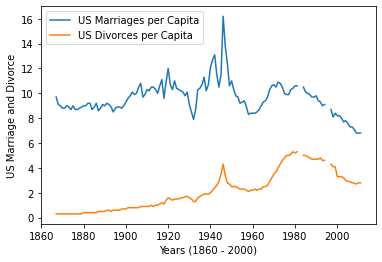

In [56]:
plt.figure()
plt.plot(years, usMar1000,label='US Marriages per Capita')
plt.plot(years, usDiv1000,label='US Divorces per Capita')
plt.xlabel("Years (1860 - 2000)")
plt.ylabel("US Marriage and Divorce")
plt.legend()

### Question 7 - Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

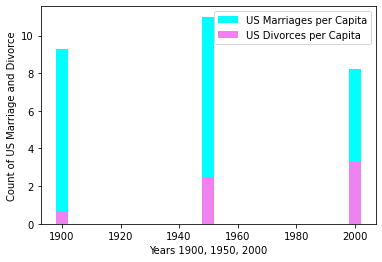

In [57]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


usMarDivData = pd.read_csv('us-marriages-divorces-1867-2014.csv')
usMarDivData = usMarDivData[usMarDivData['Year'].apply(lambda a: a in [1900, 1950, 2000])]


years = usMarDivData['Year'].values
usMar1000 = usMarDivData['Marriages_per_1000'].values
usDiv1000 = usMarDivData['Divorces_per_1000'].values


plt.figure()
plt.bar(years, usMar1000, 
        color='cyan',
        width=4,
        align='center',
        label='US Marriages per Capita')

plt.bar(years, usDiv1000,
        color='violet',
        width=4,
        align='center',
        label='US Divorces per Capita')

plt.xlabel("Years 1900, 1950, 2000")
plt.ylabel("Count of US Marriage and Divorce")
plt.legend()

### Question 8 - Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

([<matplotlib.axis.YTick at 0x285f1be2af0>,
 [Text(0, 0, 'actor_names Arnold Schwarzenegger'),
  Text(0, 1, 'actor_names Chow Yun-Fat'),
  Text(0, 2, 'actor_names Clint Eastwood'),
  Text(0, 3, 'actor_names Clive Owen'),
  Text(0, 4, 'actor_names Dolph Lundgren'),
  Text(0, 5, 'actor_names Jet Li'),
  Text(0, 6, 'actor_names Nicolas Cage'),
  Text(0, 7, 'actor_names Sylvester Stallone'),
  Text(0, 8, 'actor_names Tomisaburo Wakayama'),
  Text(0, 9, 'actor_names Wesley Snipes')])

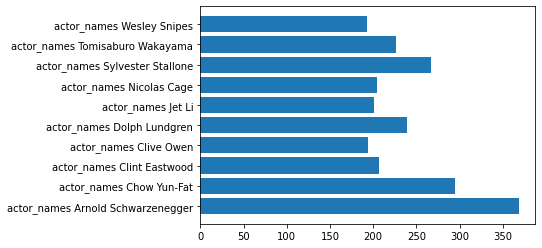

In [58]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

actorKillCount = pd.read_csv('actor_kill_counts.csv')
nameActor = actorKillCount['Actor'].values
killCounts = actorKillCount['Count'].values

val = pd.DataFrame({'nameActor': nameActor,
                                'killCounts': killCounts})

val.sort_values(by='killCounts', ascending=True)

plt.figure()

plt.barh(np.arange(len(nameActor)), killCounts)

plt.yticks(np.arange(len(nameActor)),
           ['actor_names {}'.format(a) for a in nameActor])

### Question 9 - Create a pie chart showing the fraction of all Roman Emperors that were assassinated. 
### Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

<function matplotlib.pyplot.show(close=None, block=None)>

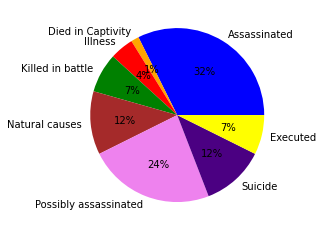

In [59]:
roman=pd.read_csv("roman-emperor-reigns.csv")

deathNumber=roman.groupby(roman["Cause_of_Death"]).Cause_of_Death.count()
deathNumber=list(deathNumber)

mylabels=['Assassinated', 'Died in Captivity', 'Illness', 'Killed in battle', 'Natural causes', 'Possibly assassinated' ,'Suicide','Executed']

plt.pie(deathNumber, 
        labels = mylabels,autopct = '%0.0f%%',
        colors=['blue', 'orange', 'red', 'green', 'brown', 'violet', 'indigo', 'yellow'])
plt.show

### Question 10 - Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
### Don't forget to label your axes!
### Color each dot according to its year.

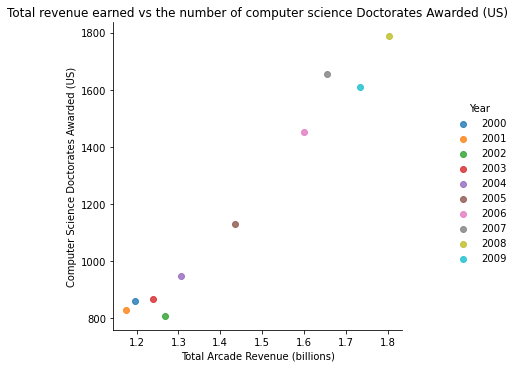

In [60]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

dataset=pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

sb.lmplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', data=dataset, hue='Year', fit_reg=True).set(title='Total revenue earned vs the number of computer science Doctorates Awarded (US)')
plt.show()

### References
#### 1 - class notes
#### 2 - python.org

<h1 style="font-size:2.5rem;color:green;"> Thank You!!</h1>